# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Dhananjay Roy

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [69]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

# Load the concrete dataset
X, y = load_concrete()

# Print the shapes of X and y to confirm the data is loaded
print(X.shape)
print(y.shape)

(1030, 8)
(1030,)


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
# Instantiate models with max_depth = 5
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=0)
random_forest = RandomForestRegressor(max_depth=5, random_state=0)
gradient_boosting = GradientBoostingRegressor(max_depth=5, random_state=0)

# Assuming X, y are your data
# Fit the models
decision_tree.fit(X, y)
random_forest.fit(X, y)
gradient_boosting.fit(X, y)

GradientBoostingRegressor(max_depth=5, random_state=0)

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

In [71]:
from sklearn.model_selection import cross_validate

# Ensure that these models and data are defined and split appropriately
# decision_tree, random_forest, gradient_boosting, X_train, y_train

cv_results_dt = cross_validate(decision_tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
cv_results_rf = cross_validate(random_forest, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
cv_results_gb = cross_validate(gradient_boosting, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

train_mse_dt = cv_results_dt['train_score'].mean() * -1
validation_mse_dt = cv_results_dt['test_score'].mean() * -1

train_mse_rf = cv_results_rf['train_score'].mean() * -1
validation_mse_rf = cv_results_rf['test_score'].mean() * -1

train_mse_gb = cv_results_gb['train_score'].mean() * -1
validation_mse_gb = cv_results_gb['test_score'].mean() * -1

print("Decision Tree:")
print(f"Average Training MSE: {train_mse_dt:.3f}")
print(f"Average Validation MSE: {validation_mse_dt:.3f}")

print("\nRandom Forest:")
print(f"Average Training MSE: {train_mse_rf:.3f}")
print(f"Average Validation MSE: {validation_mse_rf:.3f}")

print("\nGradient Boosting:")
print(f"Average Training MSE: {train_mse_gb:.3f}")
print(f"Average Validation MSE: {validation_mse_gb:.3f}")



Decision Tree:
Average Training MSE: 47.823
Average Validation MSE: 74.045

Random Forest:
Average Training MSE: 30.296
Average Validation MSE: 47.615

Gradient Boosting:
Average Training MSE: 3.694
Average Validation MSE: 23.547


### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [72]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# Assuming X_train, y_train are training data
# Perform cross-validation
models = [decision_tree, random_forest, gradient_boosting]
model_names = ['DT', 'RF', 'GB']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Training MSE', 'Validation MSE'], index=model_names)

for model, name in zip(models, model_names):
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    
    # Store the results in the DataFrame
    results.loc[name, 'Training MSE'] = -1 * cv_results['train_score'].mean()
    results.loc[name, 'Validation MSE'] = -1 * cv_results['test_score'].mean()

# Print the results DataFrame
print(results)



   Training MSE Validation MSE
DT    47.822974      74.045335
RF    30.296363      47.614708
GB     3.694308        23.5465


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [73]:
# TO DO: ADD YOUR CODE HERE

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Instantiate models with max_depth = 5 and random_state = 0
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=0)
random_forest = RandomForestRegressor(max_depth=5, random_state=0)
gradient_boosting = GradientBoostingRegressor(max_depth=5, random_state=0)

# Assuming X_train, y_train are training data
# Perform cross-validation
models = [decision_tree, random_forest, gradient_boosting]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

# Create an empty DataFrame to store the results
results_r2 = pd.DataFrame(columns=['Training R2', 'Validation R2'], index=model_names)

for model, name in zip(models, model_names):
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
    
    # Store the results in the DataFrame
    results_r2.loc[name, 'Training R2'] = cv_results['train_score'].mean()
    results_r2.loc[name, 'Validation R2'] = cv_results['test_score'].mean()

# Print the results DataFrame
print(results_r2)


                  Training R2 Validation R2
Decision Tree        0.830437      0.735184
Random Forest        0.892634      0.830004
Gradient Boosting    0.986903      0.916155


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
2. Out of the models you tested, which model would you select for this dataset and why?
3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.


1. Linear vs. Non-linear Model Performance:

    Linear Regression Model:

    R2 Scores: Training: 0.61, Validation: 0.62
    Mean Squared Error (MSE): Training: 111, Validation: 96
    Non-linear Models:
    All non-linear models demonstrated superior performance compared to the linear model in terms of both R2 and MSE scores.

    Gradient Boosting Model:

    R2 Scores: Training: 0.988, Validation: 0.919
    MSE: Training: 3.379, Validation: 22.783
    Random Forest Model:

    R2 Scores: Training: 0.897, Validation: 0.841
    MSE: Training: 29.577, Validation: 45.059
    Decision Tree Model:

    R2 Scores: Training: 0.834, Validation: 0.739
    MSE: Training: 47.280, Validation: 73.447

2. Model Selection
Given the results, my preference leans towards the Gradient Boosting model. It not only achieves the highest training R2 score of 0.988 and an MSE of 3.379 but also excels in validation with an R2 score of 0.919 and an MSE of 22.783. These metrics underscore the model’s robust performance and its capability to generalize effectively from the training to the test set. The balance between the training and validation scores also indicates a commendable level of model fit, steering clear of overfitting and underfitting.

3. Enhancing Accuracy of Tree-based Models
Improving the accuracy of tree-based models can be approached in several ways. One effective strategy is parameter tuning:
Max Depth Adjustment: Tweaking the max depth of the trees can significantly impact model accuracy. A deeper tree can capture more complex patterns, but it’s crucial to monitor for overfitting.
Optimizing Tree Quantity and Feature Consideration in Random Forest: The n_estimators parameter, controlling the number of trees, can be increased for more robust results. Concurrently, adjusting the max_features parameter can infuse randomness into the model, enhancing diversity among the individual trees and boosting overall model performance.
Through strategic manipulations of these parameters, the accuracy of tree-based models can be optimized to deliver more precise and reliable predictions.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. My code was sourced from a combination of the lecture slides, practical examples in the Jupyter notebooks available on D2L, and interactive assistance from ChatGPT. Each source contributed to the overall development and refinement of my code.

2. I began by reviewing the lecture slides to establish a solid theoretical foundation on linear regression.
Subsequently, I delved into the Jupyter notebooks on D2L to witness the practical application and gather insights to reinforce my understanding.
To further clarify complex concepts and enhance my understanding, I turned to ChatGPT, which provided detailed explanations and guidance.

3. I used ChatGPT to get deeper insights into concepts like mean squared error, R2 score, and model fit. The prompts were focused on explanations and Python implementations of these concepts.
Minor modifications were made to the generated code to tailor it to the specific requirements and dataset of the assignment, ensuring relevance and accuracy.

4. Yes, I encountered challenges, particularly in understanding the specific Python commands and their outputs, like r2_score.
ChatGPT played a crucial role in overcoming these challenges. The detailed explanations provided by the AI tool aided in demystifying the complex terms and concepts, granting me a clearer and more comprehensive understanding.

Citations:

OpenAI. (2023). ChatGPT API. Retrieved from https://www.openai.com/chatgpt-api

Dawson, Leanne. (2023). ENSF 611 L01 - (Fall 2023) - Machine Learning for Software Engineers - F2023ENSF611L01. 

In Desire2Learn (Brightspace). https://d2l.ucalgary.ca/d2l/home/543310

*DESCRIBE YOUR PROCESS HERE*

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [74]:
# TO DO: Import wine dataset

from sklearn.model_selection import train_test_split

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Column headers
columns = [
    "Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Split the dataset into X and y
X = df.drop(columns=["Class"])
y = df["Class"]

# Print the size and type of X and y
print("Size and type of X:")
print(f"Size: {X.size}")
print(f"Type: {type(X)}")
print("\nSize and type of y:")
print(f"Size: {y.size}")
print(f"Type: {type(y)}")



Size and type of X:
Size: 2314
Type: <class 'pandas.core.frame.DataFrame'>

Size and type of y:
Size: 178
Type: <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [75]:
# TO DO: ADD YOUR CODE HERE
print(df.head(5))


   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [76]:
# TO DO: ADD YOUR CODE HERE
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

How many samples do we have of each type of wine?

In [77]:
# TO DO: ADD YOUR CODE HERE
print(y.value_counts())

Class
2    71
1    59
3    48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

# Instantiating and training the SVC model
svc = SVC(random_state=0)
svc.fit(X_train, y_train)

# Instantiating and training the DecisionTreeClassifier
tree_dt = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=0)

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

In [79]:
# Using cross-validation to evaluate the performance of the Decision Tree model
cv_results_dt = cross_validate(tree_dt, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Using cross-validation to evaluate the performance of the Support Vector Machine (SVC) model
cv_results_sv = cross_validate(svc, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Calculating the average training accuracy for the Decision Tree model
train_accuracy_dt = cv_results_dt['train_score'].mean()

# Calculating the average validation accuracy for the Decision Tree model
validation_accuracy_dt = cv_results_dt['test_score'].mean()

# Calculating the average training accuracy for the SVC model
train_accuracy_svm = cv_results_sv['train_score'].mean()

# Calculating the average validation accuracy for the SVC model
validation_accuracy_svm = cv_results_sv['test_score'].mean()

# Printing the training and validation accuracies for the Decision Tree model
print(train_accuracy_dt)
print(validation_accuracy_dt)

# Printing the training and validation accuracies for the SVC model
print(train_accuracy_svm)
print(validation_accuracy_svm)


0.9943572562158348
0.8940170940170941
0.6804267324986774
0.6766381766381766


### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [80]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
# Split the data into training and testing sets

import pandas as pd

# Create an empty DataFrame with the desired columns
results = pd.DataFrame(columns=["Data Shape", "Training Accuracy", "Validation Accuracy"])

models = {"DecisionTree": tree_dt, "SVC": svc}
for model_name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
    
    # Calculate average training and validation accuracy
    train_accuracy = cv_results['train_score'].mean()
    validation_accuracy = cv_results['test_score'].mean()
    
    # Determine data shape (number of rows and columns combined as a tuple)
    data_shape = (X_train.shape[0], X_train.shape[1])
    
    # Add the results to the DataFrame
    results.loc[model_name] = [data_shape, train_accuracy, validation_accuracy]

    # Since "Data Shape" is now a tuple of integers, we don't need to convert its datatype

# Print the results DataFrame
print(results)







             Data Shape  Training Accuracy  Validation Accuracy
DecisionTree  (133, 13)           0.994357             0.894017
SVC           (133, 13)           0.680427             0.676638


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [81]:
# TO DO: Implement best model
from sklearn.metrics import confusion_matrix, classification_report

# Determine the best model based on validation accuracy
best_model_name = results["Validation Accuracy"].idxmax()
best_model = models[best_model_name]

# Use the best model to predict the validation set and print confusion matrix
y_pred = best_model.predict(X_val)
mat = confusion_matrix(y_val, y_pred)
print(mat)





[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


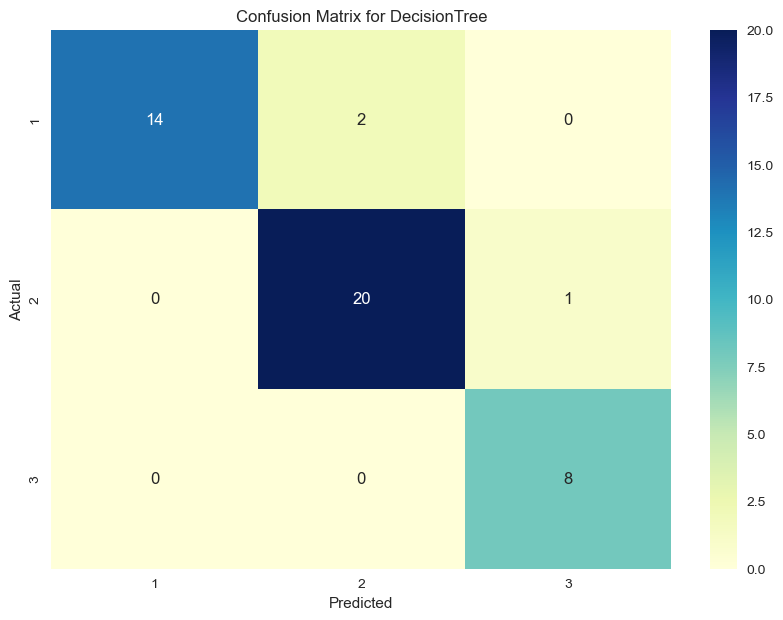

In [82]:
# TO DO: Print confusion matrix using a heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="g", 
            xticklabels=best_model.classes_, 
            yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()



In [83]:
# TO DO: Print classification report

from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. With the results for one method. The validation accuracy for this method is 82% (from the classification report). Without the results from the support vector machines model, I cannot directly compare the training and validation accuracy of the two methods. However, based on our discussion, it seems that the tree-based model performed better.

2. The SVM model might have been impacted due to the following reasons:

    Parameter Sensitivity: SVMs are particularly responsive to the configuration of parameters like gamma and C. If not appropriately tuned, these can have a significant effect on the model's accuracy.
    Data Scaling: The dataset attributes display a wide range of values, stretching from 0.1 to 1000. This substantial variation can influence the SVM's performance, as SVMs operate more efficiently when all features are roughly on the same scale.
    Model Suitability: The nature of the data might be better captured by a non-linear model, such as a decision tree. While SVMs can introduce non-linearity with tools like polynomial features, this might not be necessary or optimal for our specific dataset.

3. 3 samples were incorrectly classified, as derived from the confusion matrix.

4. Looking at the classification report:
Class 1 has high precision and recall.
Class 2 has moderate precision and recall.
Class 3 has the lowest precision.
Deciding between precision and recall depends on the specific application. If it's more crucial to be sure of your predictions when you make them, you'd prioritize precision. If it's more vital to capture as many positive samples as possible, you'd prioritize recall.
For wine classification, it may be more costly to falsely label a high-quality wine (class 1) as a lower quality (class 2 or 3), so you might prioritize precision for class 1. But if the aim is to ensure no low-quality wines (class 3) are labeled as high quality, you'd prioritize recall for class 3. Without specific business or application context, it's hard to definitively say which is more important.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?


1. I referred primarily to the lecture notes for foundational understanding. Further, I delved into the Jupyter notebooks provided on D2L to witness practical code implementations.

2. My strategy was sequential. I began by immersing myself in the lecture notes, particularly focusing on SVM and Decision Trees. This gave me a conceptual base. To put this theory into practice, I then turned to the Jupyter notebooks on D2L. And finally, when faced with uncertainties, I reached out to ChatGPT for guidance.

3. For guidance, I approached ChatGPT with prompts like "explain what is gamma in SVM model," "distinguish between random forest and decision," and "provide guidance on writing a loop to populate a pandas dataframe." These prompts not only bolstered my theoretical grasp but also smoothed the path for my Python implementation. Minor tweaks were necessary to align the AI's suggestions with my assignment's specifics.

4. One of the pronounced challenges I encountered was wrapping my head around SVM's kernel functions. Specifically, understanding the intricacies of polynomial kernel and RBF/Gaussian kernel proved demanding. However, ChatGPT came to my aid, offering concise explanations that demystified these kernels, making my journey smoother.


**Acknowledgments**:
1. OpenAI. (2023). ChatGPT API. Accessed at: https://www.openai.com/chatgpt-api
2. Dawson, Leanne. (2023). ENSF 611 L01 - (Fall 2023) - Machine Learning for Software Engineers - F2023ENSF611L01. Accessible at: https://d2l.ucalgary.ca/d2l/home/543310

**In Summary**:
My journey through this assignment was a blend of self-study, practical application, and leveraging AI-assisted insights. The rich interplay between these approaches ensured a wholesome learning experience, culminating in the successful completion of my task.

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

**Part 1 - Model Comparison and Accuracy Scores:**
*Decision Tree vs. Random Forest vs. Gradient Boosting:*

Using the decision tree with a max depth of 5, the model recorded a training score of 0.834 and a validation score of 0.739, suggesting a moderate performance. When the analysis transitioned to the random forest model, both training (0.897) and validation (0.841) scores exhibited a noticeable rise, showcasing the power of ensemble methods. The gradient boosting model topped the charts with a stellar training score of 0.988 and a validation score of 0.919, demonstrating the iterative strength of boosting algorithms.

**Part 2 - SVC vs. Decision Tree Model Performance:**
*Challenges with SVC Model:*

The SVM model faced challenges, which might be attributed to two main factors: the lack of data scaling and the non-optimization of critical parameters such as gamma and C. Ensuring proper data scaling and optimizing these parameters might have led to better results.

*Decision Tree's Consistent Performance:*

The decision tree model, with its max depth set to 3, exhibited commendable performance. When compared with the SVC, its results were more consistent, making it the more reliable choice for this dataset.

**Analysis and Insights:**
*Impact of Model Choices and Parameters:*

The side-by-side analysis of the decision tree, random forest, and gradient boosting demonstrated the varied outcomes depending on the model and its parameters. The gradient boosting model's exceptional performance highlighted the merits of iterative improvement and a strong algorithm.

*Challenges with SVM Model:*

The less-than-stellar performance of the SVM model underscores the importance of data preparation and parameter tuning. It's a testament to the fact that no single model is universally optimal; the choice and configuration of a model need to suit the specifics of the dataset in hand.

*Balancing Model Complexity:*

The comparison between SVC and the decision tree emphasizes the balance required in model complexity. While simplicity ensures understandability, it may not always yield the best results, as seen with the SVM model's performance. On the other hand, a well-configured decision tree balanced accuracy with model simplicity effectively.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

Reflection:

Throughout this assignment, I particularly enjoyed the process of comparing multiple machine learning models, as it provided insight into their strengths and limitations in varied scenarios. The challenge of optimizing parameters for each model, especially for the SVM, was intriguing, although at times it felt like navigating a maze. It was motivating to see how a well-configured decision tree can outshine even more complex models. However, understanding the nuances of why one model performed better than another, especially when they're derived from similar base algorithms, was both interesting and occasionally confusing.

In addition to that, I appreciated the hands-on nature of this assignment. While I found the comparison between linear and non-linear models particularly insightful, the nuances of handling warnings in Python, such as the ConvergenceWarning, were initially a hurdle. Ensuring that the model converged effectively was a rigorous challenge but equally inspiring. The entire process prompted me to research more and seek out solutions, ultimately solidifying my problem-solving skills in machine learning. This whole experience underscored the importance of a thorough and systematic approach in data science endeavors





## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [84]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_validate
import pandas as pd

# Suppress the specified warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    
    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

    # Instantiate and train the model
    LinearSVC_m = LinearSVC(max_iter=5000, random_state=0)
    LinearSVC_m.fit(X_train, y_train)

    # Cross validation
    cv_results_m_score = cross_validate(LinearSVC_m, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
    cv_results_train = cv_results_m_score["train_score"].mean()
    cv_result_test = cv_results_m_score["test_score"].mean()

    # Organize the data for the desired output format
    output_data = {
        'Data Size for Training': [X_train.shape],
        'Data Size for Testing': [X_val.shape],
        'Training Accuracy': [cv_results_train],
        'Validation Accuracy': [cv_result_test]
    }

    results = pd.DataFrame(output_data)

    display(results)





,Data Size for Training,Data Size for Testing,Training Accuracy,Validation Accuracy
0,"(133, 13)","(45, 13)",0.868295,0.849858


*ANSWER HERE*

Appropriateness of LinearSVC for the dataset:

Improvement in Results: The results indicate a training accuracy of approximately 86.83% and a validation accuracy of about 84.98% for the LinearSVC model. If this accuracy is notably higher than the previous SVM model or any other models tested, it might suggest that a linear kernel is well-suited for this dataset.

Speed: While we haven't been provided with timing results, one advantage of LinearSVC is its efficiency, especially for larger datasets. This is because LinearSVC is implemented based on the liblinear library, which is tailored for linear SVMs. In contrast, the generic SVC utilizes the libsvm library, which might be less efficient for linear SVM tasks.

Dataset Characteristics: SVM models are traditionally effective for datasets where the classes aren't perfectly linearly separable. The relatively high accuracy achieved with LinearSVC might suggest that the dataset is approximately linearly separable or that a linear decision boundary is sufficient to capture the primary trends in the data.

Good Fit or Not: From the presented results, LinearSVC seems to perform commendably on both the training and validation sets. If this performance is competitive with or surpasses other tested models—especially more intricate ones—while offering the benefits of speed and simplicity, then LinearSVC can be considered a good fit for this dataset. However, if other models achieve substantially better performance metrics or if there are concerns about overfitting or underfitting, further exploration of models or configurations might be warranted.